# Descriptive Analysis

At this point we have the data in the following dataframe: 
| job_id | skill_id | similarity_score |
|--------|----------|------------------|
| 243ef92c3012f0f0 | 2012 | 0.5371401 | 
| ... | ... | ... |

In this notebook we will perform the join with the job titles and skill names to have a more descriptive dataframe.

In [2]:
import pandas as pd

In [ ]:
# Load the data
df_joined = pd.read_csv("../data/green_jobs_normalized.csv")
df_jobs = pd.read_csv("../data/jan_to_apr_2025_with_languages_cleaned.csv")
df_skills = pd.read_csv("../data/taxonomies/esco_green_skills_cleaned.csv")


In [ ]:
# Prepare the jobs (they are duplicated jobs, we only need the unique ones to get the titles)
df_jobs_unique = df_jobs.drop_duplicates(subset=["Job_ID"])[["Job_ID", "Title"]]
df_jobs_unique.rename(columns={"Job_ID": "job_id"}, inplace=True)

# Merge jobs with the main dataframe
merged_jobs = pd.merge(df_joined, df_jobs_unique, on="job_id", how="left")

In [12]:
merged_jobs.head()

,job_id,skill_id,similarity_score,Title
0,243ef92c3012f0f0,2012,0.537140,process quality lead - machining
1,e2e422fd6ea193fb,211,0.508682,ejecutivo de ventas jeep
2,0dffb51a47828590,2424,0.506158,business unit leader - machining
3,0dffb51a47828590,1577,0.502190,business unit leader - machining
4,0dffb51a47828590,1214,0.509662,business unit leader - machining


In [ ]:
# Prepare the skills for merging
df_skills = df_skills.reset_index().rename(columns={"index": "skill_id", "green_skill": "skill_name"}) # Add skill_id as a column 
merged_final = pd.merge(merged_jobs, df_skills, on="skill_id", how="left") # Merge with skills to get skill names

In [17]:
merged_final.head()

,job_id,skill_id,similarity_score,Title,skill_name,alt_label,description
0,243ef92c3012f0f0,2012,0.537140,process quality lead - machining,lean manufacturing,WCM world class manufacturing,Lean manufacturing is a methodology that focus...
1,e2e422fd6ea193fb,211,0.508682,ejecutivo de ventas jeep,develop management plans,management plans preparing,Develop management plans to maintain fisheries...
2,0dffb51a47828590,2424,0.506158,business unit leader - machining,coordinate shipments of recycling materials,coordinating shipments of recycling materials,Coordinate and oversee shipments of recycling ...
3,0dffb51a47828590,1577,0.502190,business unit leader - machining,store sorted waste,sorted waste storing,"Store waste materials, products, and appliance..."
4,0dffb51a47828590,1214,0.509662,business unit leader - machining,inspect recycling procedures,recycling procedures inspecting,Inspect the implementation of waste management...


In [ ]:
# Reorder columns and save to csv
result = merged_final[[
    "job_id", "Title", "skill_id", "skill_name", "similarity_score",
    "alt_label", "description"
]]

result.to_csv("../data/green_jobs_with_titles.csv", index=False)

## Final .csv

| job_id | Title | skill_id | skill_name | similarity_score | alt_label | description |
|--------|-------|----------|------------|------------------|-----------|-------------|
| 243ef92c3012f0f0 | process quality lead - machining | 2012 | lean manufacturing | 0.5371401 | WCM world class manufacturing | Lean manufacturing is a methodology that focuses on minimizing waste within manufacturing systems while simultaneously maximizing productivity. |
| e2e422fd6ea193fb | ejecutivo de ventas jeep | 211 | develop management plans | 0.5086822 | management plans preparing | "Develop management plans to maintain fisheries and habitat |  or restore them when necessary." |
| ... | ... | ... | ... | ... | ... | ... |

In [19]:
import matplotlib.pyplot as plt

In [25]:
result = pd.read_csv("../data/green_jobs_with_titles.csv")

In [26]:
total_records = len(result)
unique_jobs = result["job_id"].nunique()
unique_skills = result["skill_id"].nunique()

print(f"Total records: {total_records}")
print(f"Unique jobs: {unique_jobs}")
print(f"Unique skills: {unique_skills}")

Total records: 5037
Unique jobs: 1810
Unique skills: 721


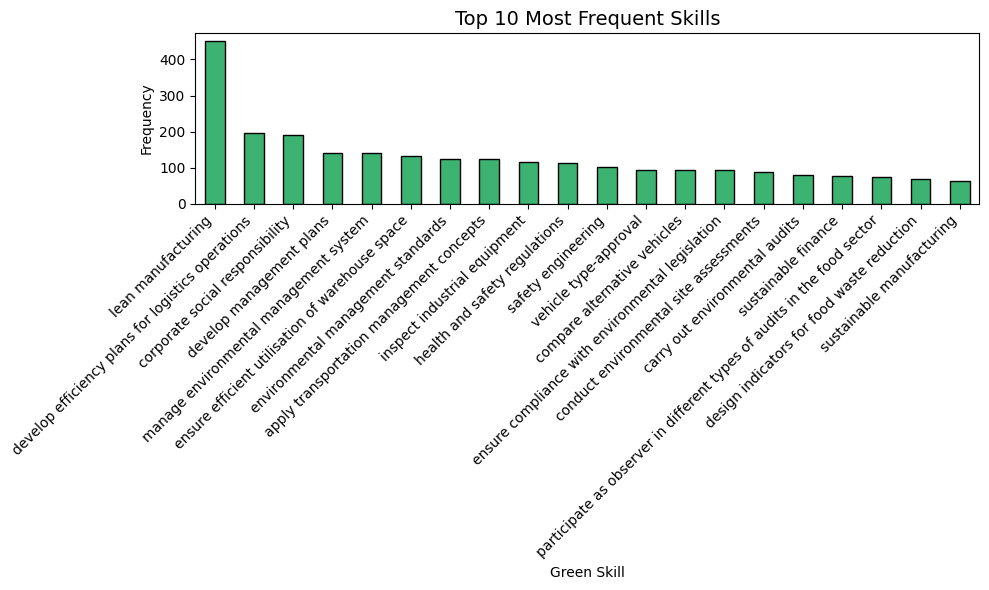

In [29]:
plt.figure(figsize=(10,6))

skill_freq = result["skill_name"].value_counts()
skill_freq.head(20).plot(kind="bar", color="mediumseagreen", edgecolor="black")

plt.title("Top 10 Most Frequent Skills", fontsize=14)
plt.xlabel("Green Skill")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [30]:
skill_freq.to_csv("../data/skill_frequencies.csv")